# Predicting Sales from Advertising Expenditure: An Advertising ROI Analysis Using Linear Regression

**DATASET:**
<br>The advertising dataset captures the sales revenue generated with respect to advertisement costs across multiple channels like radio, tv, and newspapers. It is required to understand the impact of ad budgets on the overall sales. The dataset is taken from kaggle (<https://www.kaggle.com/datasets/yasserh/advertising-sales-dataset>)
<br>**GOAL:**
<br>The goal of this project is to predict sales based on advertising expenditure and perform an advertising Return on Investment (ROI) analysis using linear regression.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [3]:
data= pd.read_csv("C:/Users/anush/Downloads/archive (7)/Advertising Budget and Sales.csv")
data.head()

,TV_AdBudget,Radio_AdBudget,Newspaper_AdBudget,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
#Checking for null values
data.isnull().sum()

TV_AdBudget           0
Radio_AdBudget        0
Newspaper_AdBudget    0
Sales                 0
dtype: int64

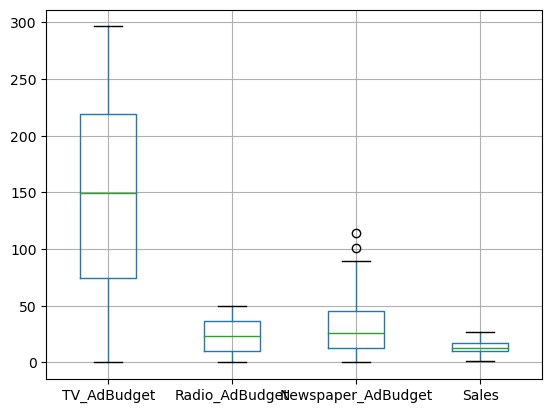

In [5]:
#Checking for outliers
data.boxplot()
plt.show()

In [6]:
#Removing the outliers from the dataset
z_scores = np.abs((data - data.mean()) / data.std())
threshold = 3
outlier_indices = np.where(z_scores > threshold)
data_no_outliers = data.drop(outlier_indices[0])
print(data_no_outliers)

     TV_AdBudget  Radio_AdBudget  Newspaper_AdBudget  Sales
0          230.1            37.8                69.2   22.1
1           44.5            39.3                45.1   10.4
2           17.2            45.9                69.3    9.3
3          151.5            41.3                58.5   18.5
4          180.8            10.8                58.4   12.9
..           ...             ...                 ...    ...
195         38.2             3.7                13.8    7.6
196         94.2             4.9                 8.1    9.7
197        177.0             9.3                 6.4   12.8
198        283.6            42.0                66.2   25.5
199        232.1             8.6                 8.7   13.4

[198 rows x 4 columns]


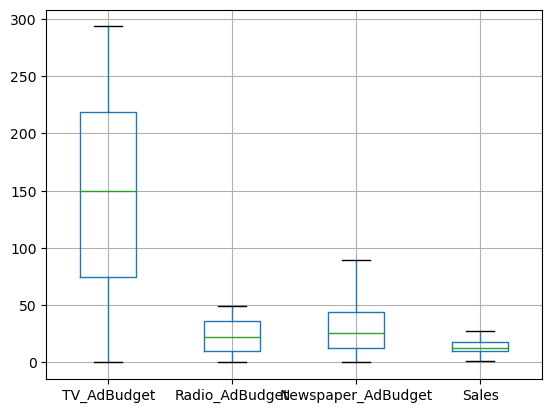

In [7]:
data_no_outliers.boxplot()
plt.show()

In [8]:
X = data[['TV_AdBudget', 'Radio_AdBudget', 'Newspaper_AdBudget']]
y = data['Sales']
tv=data[['TV_AdBudget']]
radio=data[['Radio_AdBudget']]
news=data[['Newspaper_AdBudget']]
advertising_cost = data[['TV_AdBudget', 'Radio_AdBudget', 'Newspaper_AdBudget']]

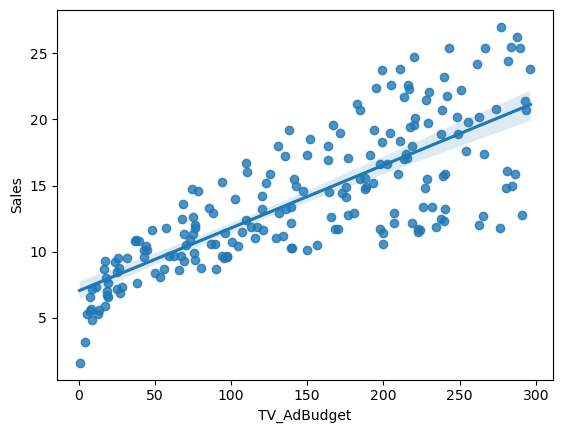

In [9]:
#visualizing the relationship between the amount spent on advertising on TV and units sold
sns.regplot(x=tv, y=y,data=data_no_outliers)
plt.show()

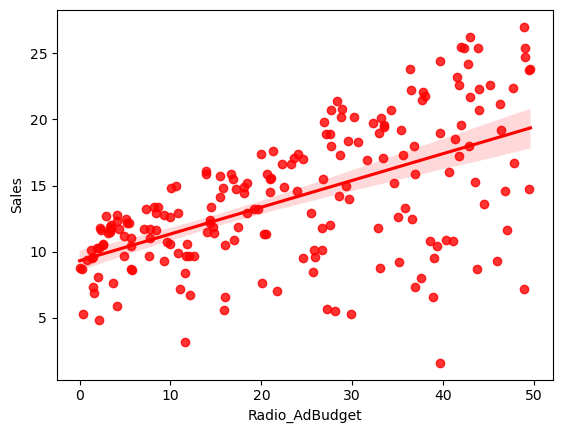

In [10]:
#visualizing the relationship between the amount spent on advertising on radio and units sold
sns.regplot(x=radio, y=y,color='r',data=data_no_outliers)
plt.show()

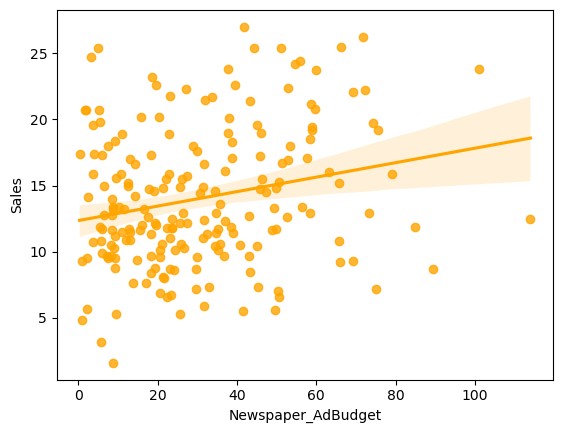

In [11]:
##visualizing the relationship between the amount spent on advertising on news and units sold
sns.regplot(x=news, y=y,color='orange',data=data_no_outliers)
plt.show()

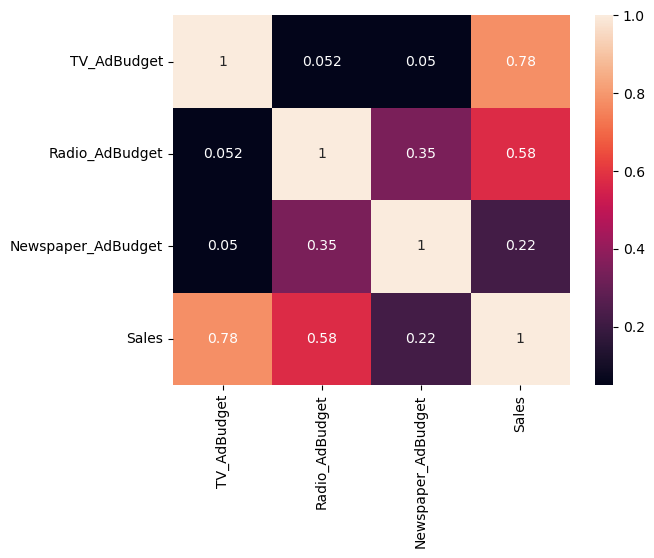

In [12]:
#Heatmap for correlation among the variables
sns.heatmap(data_no_outliers.corr(), annot=True)
plt.show()

In [13]:
X_train, X_test, y_train,y_test,cost_train, cost_test= train_test_split(X,y,advertising_cost,test_size=0.3,random_state=0)
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("Mean squared error=", mean_squared_error(y_test,y_pred))
print("R2 score=", r2_score(y_test,y_pred))

Mean squared error= 3.6913948456986065
R2 score= 0.8649018906637792


In [14]:
#Calculating roi for the test set
roi_test = (y_pred - cost_test.sum(axis=1)) / cost_test.sum(axis=1)
roi_test.head()

18    -0.906864
170   -0.907085
107   -0.938955
98    -0.936929
177   -0.943801
dtype: float64

In [15]:
# Calculate the ROI for the entire dataset
y_pred_full = model.predict(X)
roi_full = (y_pred_full - advertising_cost.sum(axis=1)) / advertising_cost.sum(axis=1)

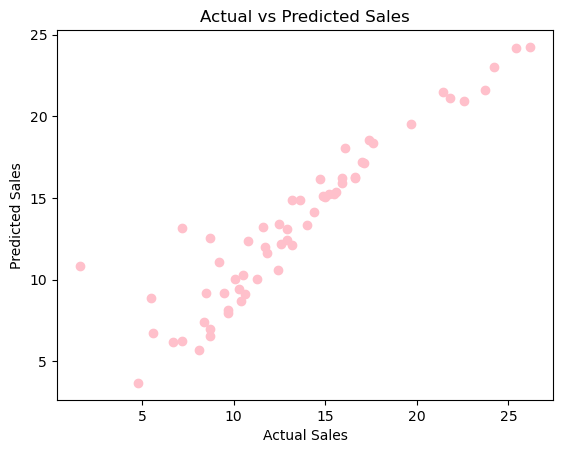

In [16]:
plt.scatter(y_test, y_pred,color='pink')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

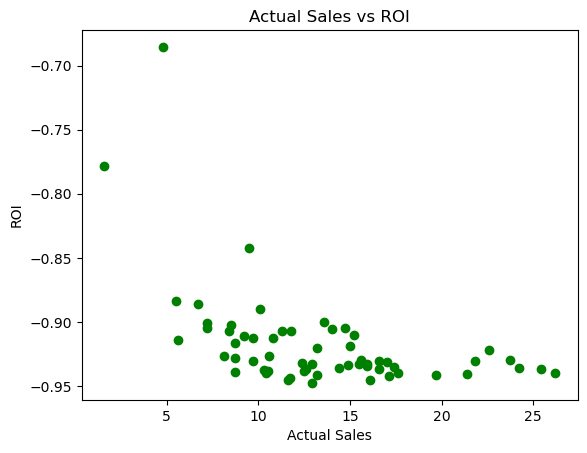

In [30]:
#Sales Vs ROI for the testing dataset
plt.scatter(y_test, roi_test,color='green')
plt.xlabel('Actual Sales')
plt.ylabel('ROI')
plt.title('Actual Sales vs ROI')
plt.show()

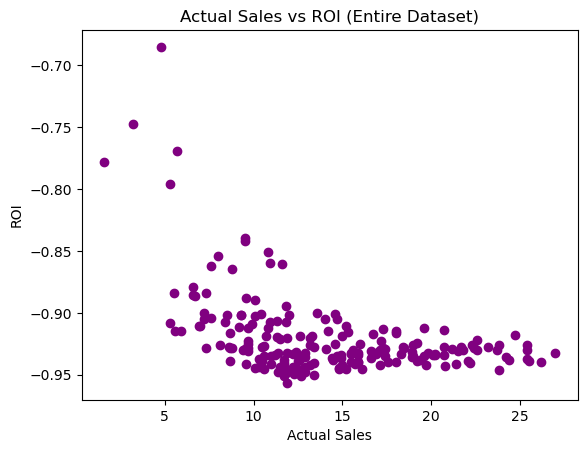

In [31]:
#Sales Vs ROI for the complete dataset
plt.scatter(y, roi_full,color='purple')
plt.xlabel('Actual Sales')
plt.ylabel('ROI')
plt.title('Actual Sales vs ROI (Entire Dataset)')
plt.show()

In [35]:
# Analyze the impact of advertising expenditure on ROI
advertising_channels = ['TV_AdBudget', 'Radio_AdBudget', 'Newspaper_AdBudget']
coefficients = model.coef_

for channel, coef in zip(advertising_channels, coefficients):
    print(f'{channel}: {coef}')

TV_AdBudget: 0.04391531369103204
Radio_AdBudget: 0.20027961716022194
Newspaper_AdBudget: 0.0018436817790911516


In [36]:
# Calculate correlation between advertising expenditure and ROI
correlations = data[advertising_channels + ['Sales']].corr()['Sales'][:-1]
print('Correlation between Advertising Expenditure and Sales:')
print(correlations)

Correlation between Advertising Expenditure and Sales:
TV_AdBudget           0.782224
Radio_AdBudget        0.576223
Newspaper_AdBudget    0.228299
Name: Sales, dtype: float64


- The linear regression model is trained using the features TV, radio, and newspaper advertisement budgets as predictors and sales as the target variable. The model is then used to predict sales for the test set.
- The analysis also includes calculating ROI for the test set and the entire dataset. ROI is determined by comparing the predicted sales to the total advertising budget. This allows us to understand the effectiveness of the advertising campaigns in terms of generating sales and achieving a positive return on investment. In our data, we can see that all the features provide an increase in Sales to a certain extent by looking at the correlation with Sales. Sales is highly correlated with the feature TV indicating that increased expenditure on television advertisements increases sales. 
- On analysing the impact of advertising expenditure on ROI, we can see that all 3 features provide a positive return of investment although it is of a very small magnitude. This is also evident from the Sales Vs ROI scatter plots that do not have any particular pattern. Majority of the points lie in a horizontal line parallel to the X-axis indicating no significant positive or negative relationship.
